In [ ]:
import pandas as pd
data = pd.read_csv("Wine.csv")
data.head()

Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

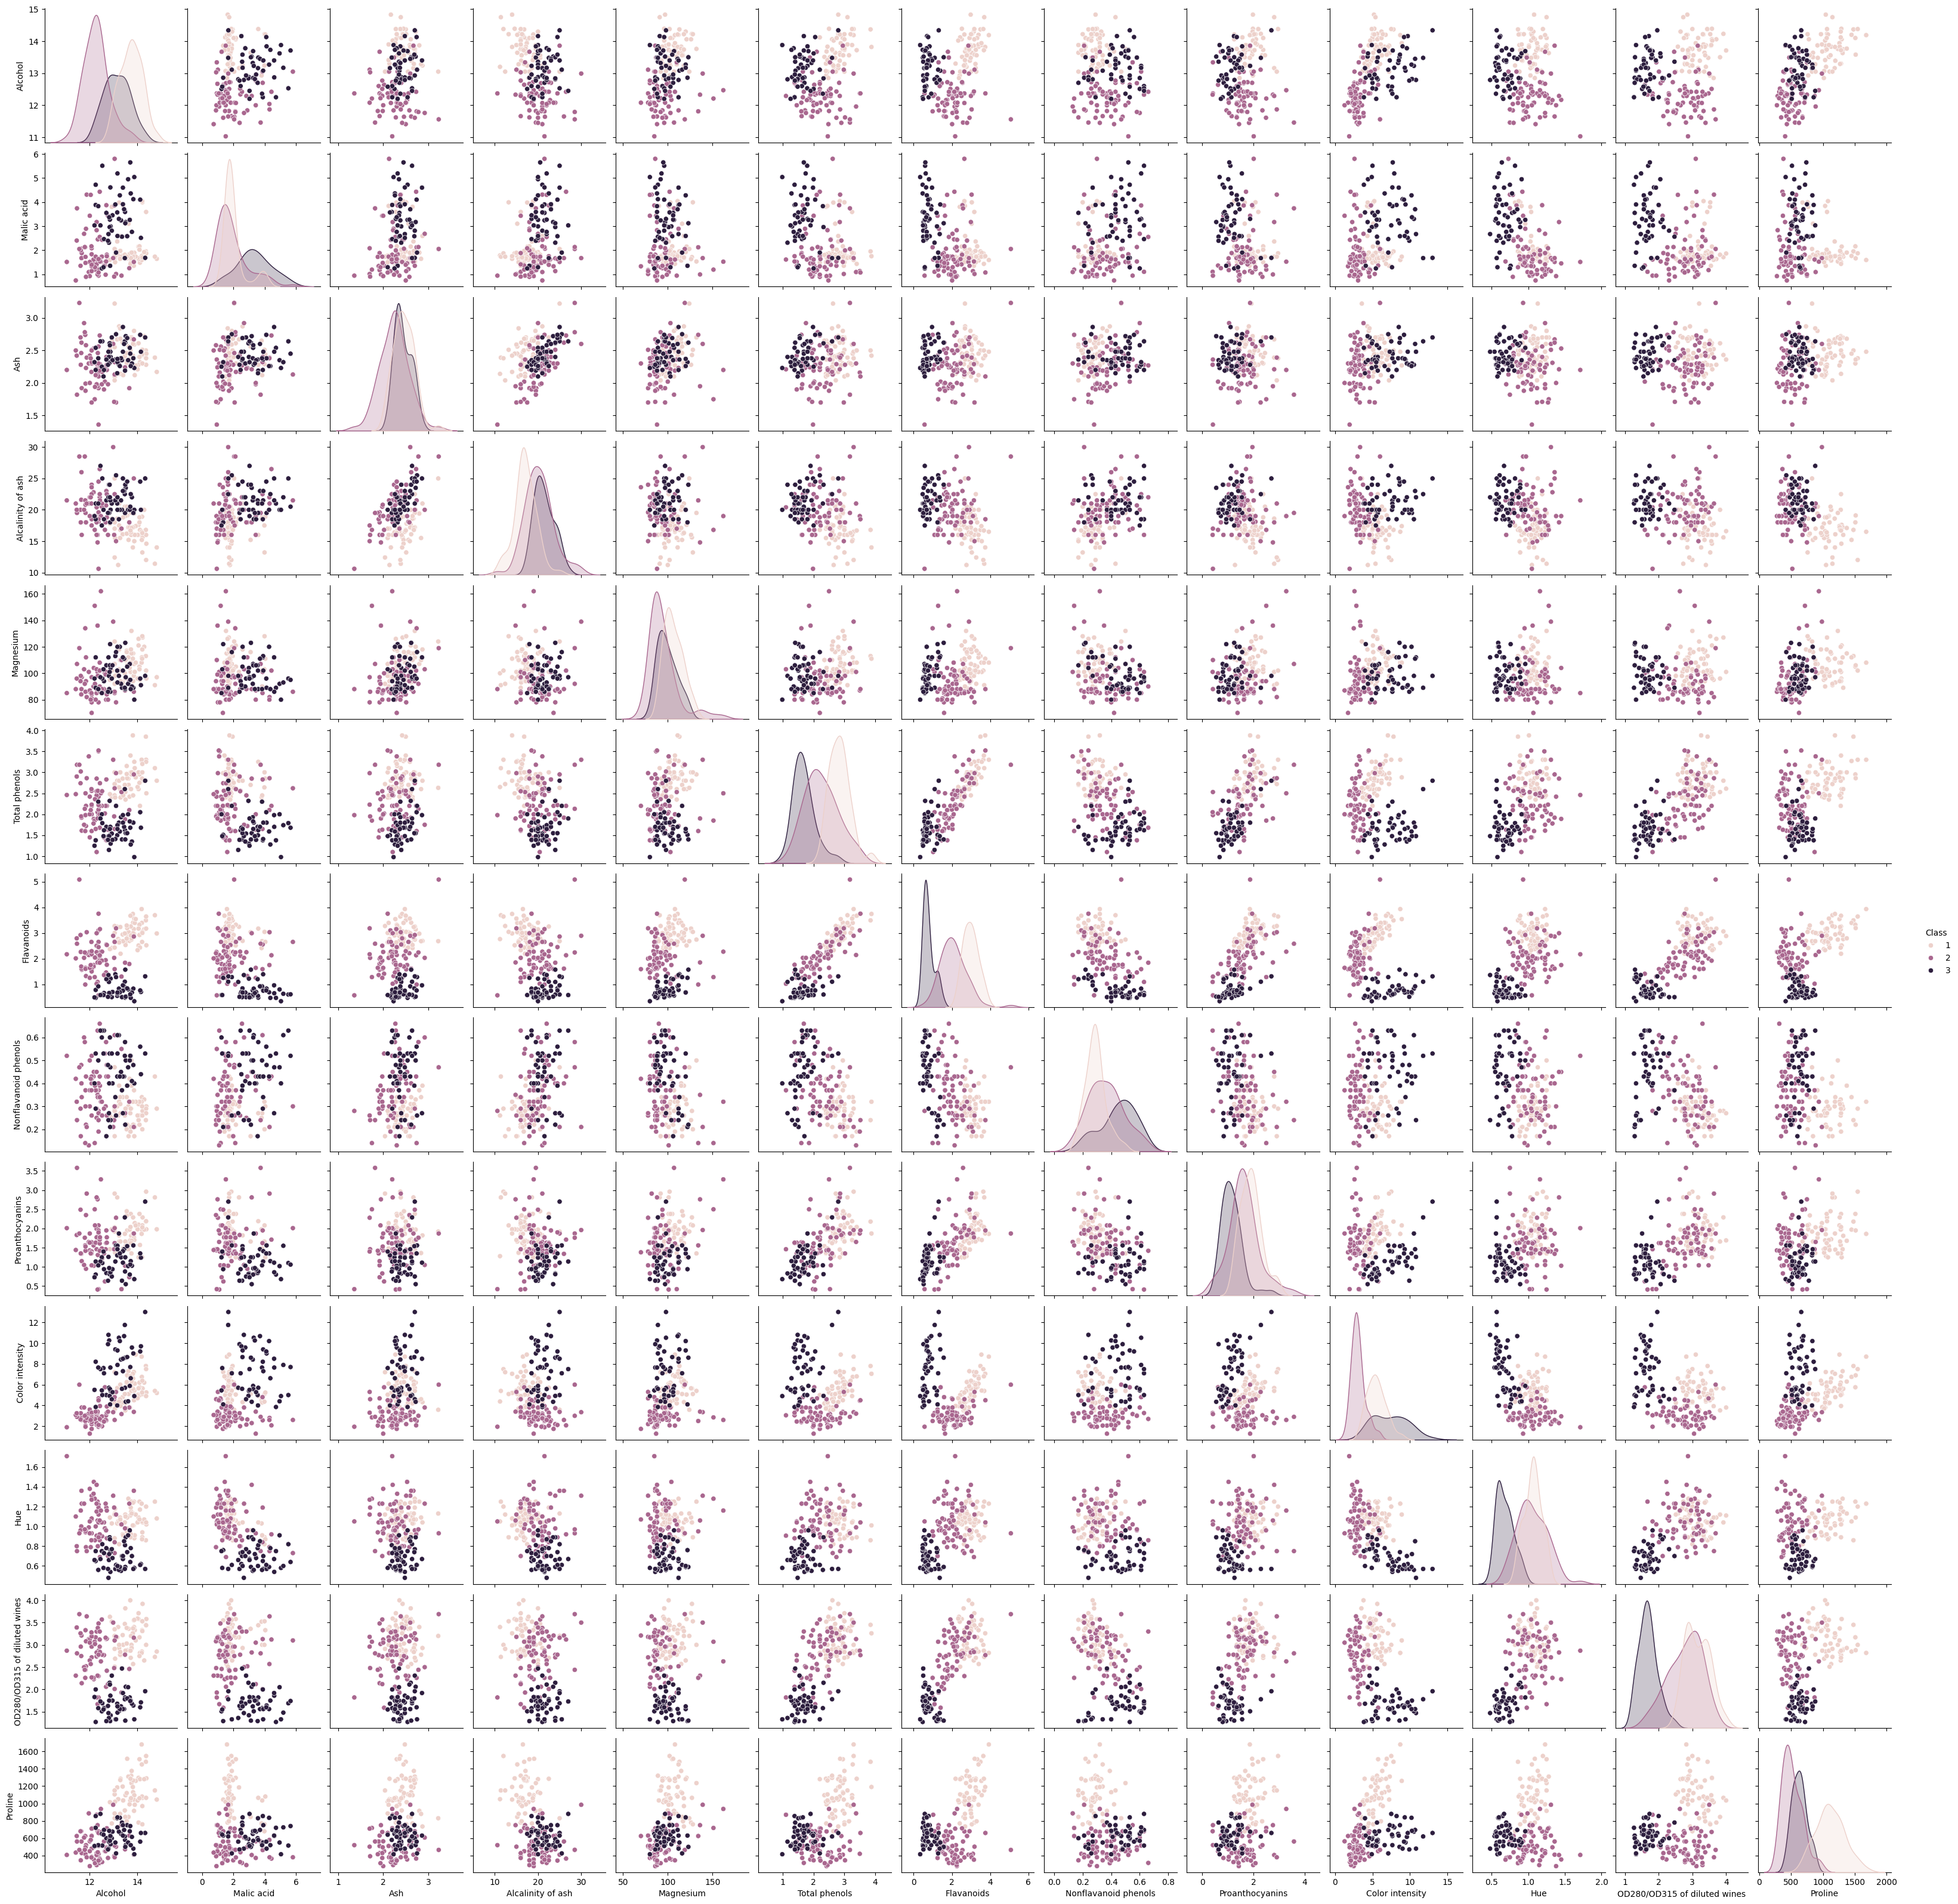

In [3]:
import seaborn as sns
sns.pairplot(data, hue="Class")

<Axes: >

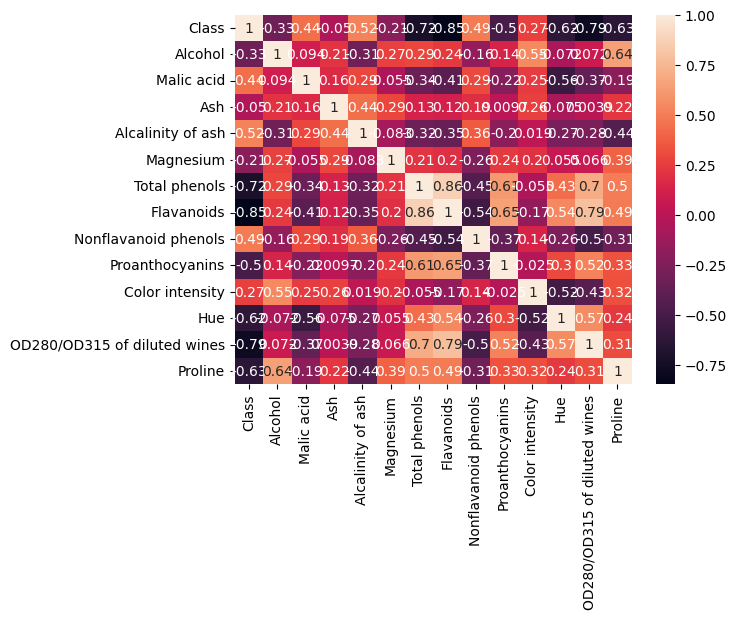

In [4]:
sns.heatmap(data.corr(), annot=True)

In [109]:
data.drop(['Ash'], axis = 1, inplace = True)

<Axes: >

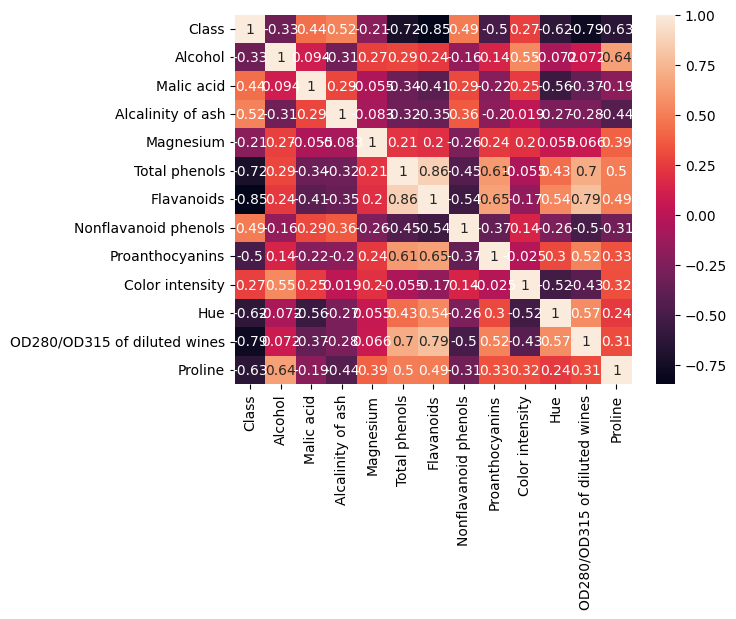

In [110]:
sns.heatmap(data.corr(), annot=True)

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [111]:
X, Y = data.drop(columns=["Class"]), data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
y_pred = naive_bayes_classifier.predict(X_test)
nbc_accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes accuracy: {nbc_accuracy}")



Naive Bayes accuracy: 0.9444444444444444


In [140]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"LDA accuracy: {lda_accuracy}")  

LDA accuracy: 0.9444444444444444


In [139]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
qda_accuracy = accuracy_score(y_test, y_pred)
print(f"QDA accuracy: {qda_accuracy}")  

QDA accuracy: 0.9722222222222222


In [138]:
print("Пред отстранувањето, LDA имаше најголема прецизност, бидејќи за разлика од\nНаивен Баесов, кој се базира на условна независност, ЛДА наоѓа линеарна граница.\nСо ова можеме да претпоставиме дека податочното множество е линеарно сепарабилно.\nСо отстранувањето на Ash, перформансот на QDA се подобри бидејќи се намали\nсепарабилноста. Дополнително, QDA овозможува користење на различни коваријантни\nматрици за секоја класа, што значи дека подобро се приспособува на новата\nраспределба на податоците. Промената на перформансот сугерира дека Ash можеби\nвоведувала линеарна зависност меѓу класите, што ја фаворизираше ЛДА.\nСо нејзиното отстранување, податоците станале посоодветни за QDA, кој моделира\nнелинеарни граници и подобро ги разликува класите со различна коваријантност.\nОвој резултат ја истакнува важноста на анализа на карактеристиките и нивното\nвлијание врз моделите, бидејќи правилниот избор на влезни податоци значително\nја подобрува точноста на класификацијата.")

Пред отстранувањето, LDA имаше најголема прецизност, бидејќи за разлика од
Наивен Баесов, кој се базира на условна независност, ЛДА наоѓа линеарна граница.
Со ова можеме да претпоставиме дека податочното множество е линеарно сепарабилно.
Со отстранувањето на Ash, перформансот на QDA се подобри бидејќи се намали
сепарабилноста. Дополнително, QDA овозможува користење на различни коваријантни
матрици за секоја класа, што значи дека подобро се приспособува на новата
распределба на податоците. Промената на перформансот сугерира дека Ash можеби
воведувала линеарна зависност меѓу класите, што ја фаворизираше ЛДА.
Со нејзиното отстранување, податоците станале посоодветни за QDA, кој моделира
нелинеарни граници и подобро ги разликува класите со различна коваријантност.
Овој резултат ја истакнува важноста на анализа на карактеристиките и нивното
влијание врз моделите, бидејќи правилниот избор на влезни податоци значително
ја подобрува точноста на класификацијата.
